Please select the articles file.
Please select the authors file.
Total unique authors: 299


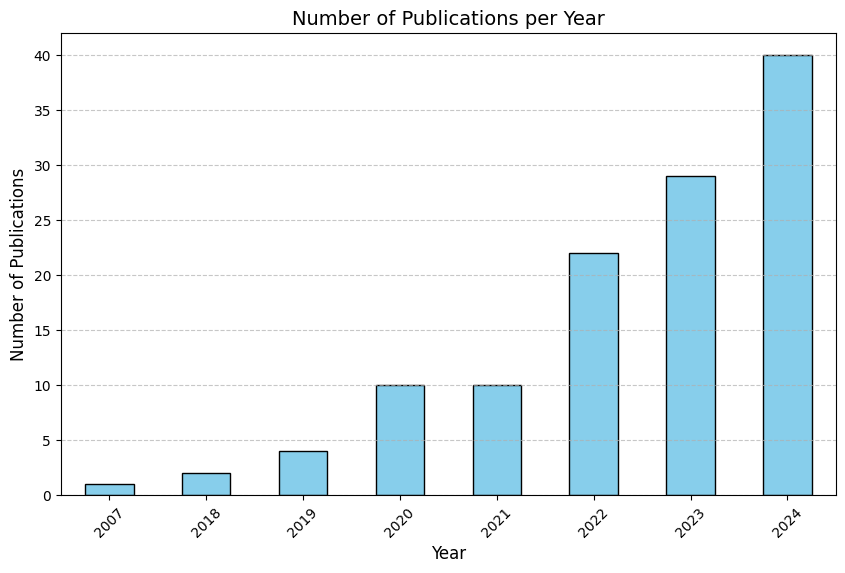

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from tkinter import Tk
from tkinter.filedialog import askopenfilename

def read_data(file_path):
    """Reads data from an Excel file."""
    try:
        data = pd.read_excel(file_path)
        return data
    except Exception as e:
        print(f"Error reading file {file_path}: {e}")
        return None

def save_figure(fig_id, folder='images', extension='png', resolution=300):
    """Saves the figure to a file."""
    if not os.path.exists(folder):
        os.makedirs(folder)
    file_path = os.path.join(folder, f"{fig_id}.{extension}")
    plt.savefig(file_path, format=extension, dpi=resolution)

# Prompt user to select files
Tk().withdraw()  # Hide the root Tkinter window
print("Please select the articles file.")
articles_file = askopenfilename(title="Select Articles File", filetypes=[("Excel Files", "*.xlsx")])
print("Please select the authors file.")
authors_file = askopenfilename(title="Select Authors File", filetypes=[("Excel Files", "*.xlsx")])

if articles_file and authors_file:
    articles = read_data(articles_file)
    authors = read_data(authors_file)

    if articles is not None and authors is not None:
        # Count total authors
        total_authors = authors['Author Name'].nunique()
        print(f"Total unique authors: {total_authors}")

        # Count publications by year
        if 'Year Published' in articles.columns:
            pub_by_year = articles.groupby('Year Published').size()

            # Plot the number of publications per year
            plt.figure(figsize=(10, 6))
            pub_by_year.plot(kind='bar', color='skyblue', edgecolor='black')
            plt.title('Number of Publications per Year', fontsize=14)
            plt.xlabel('Year', fontsize=12)
            plt.ylabel('Number of Publications', fontsize=12)
            plt.xticks(rotation=45, fontsize=10)
            plt.grid(axis='y', linestyle='--', alpha=0.7)

            # Save and show the plot
            save_figure("publications_per_year")
            plt.show()
        else:
            print("The 'Year Published' column is missing in the articles file.")
    else:
        print("Failed to read one or both files. Please check the file paths and formats.")
else:
    print("File selection was canceled.")


# Seaborn 
is a Python data visualization library built on top Matplotlib. It provides a high-level interface for creating attractive and informative statistical graphics 
# Tkinter
is a Python's built-in library for creating graphical user interface (GUIs). It provides tools to build windows, buttons, menus, and file dialogs

Please select the articles file.
Please select the authors file.
Total unique authors: 299


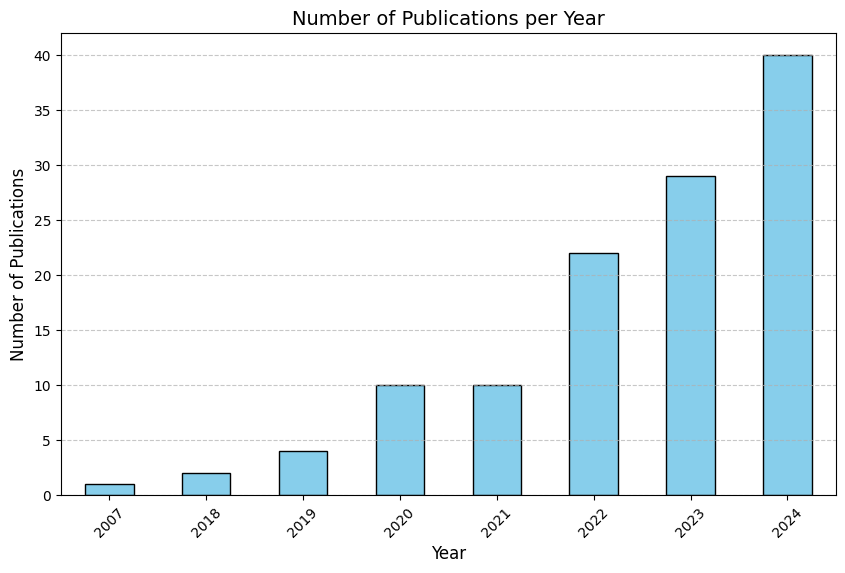

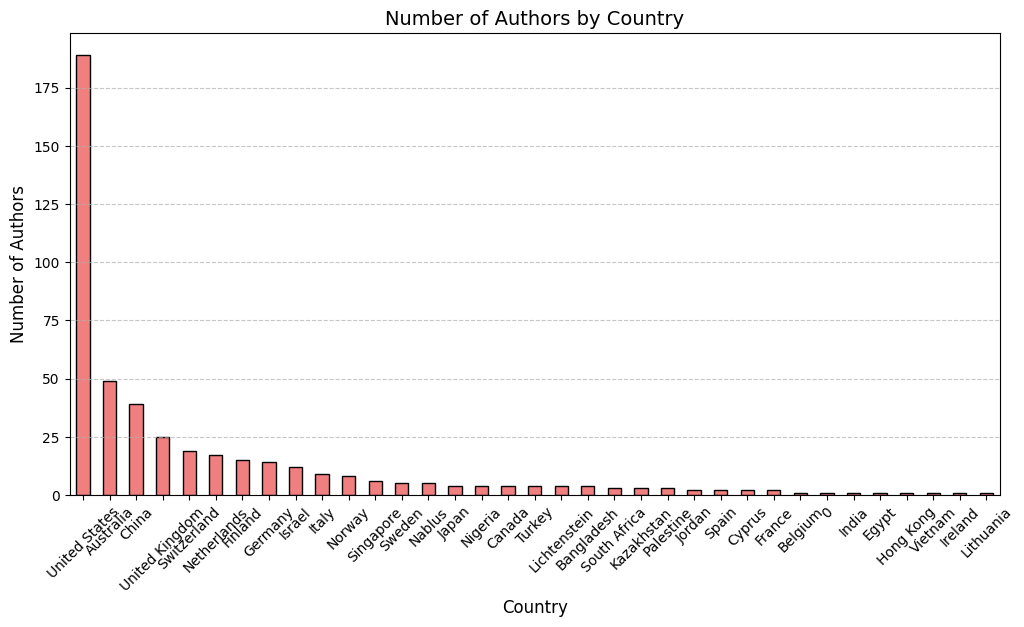

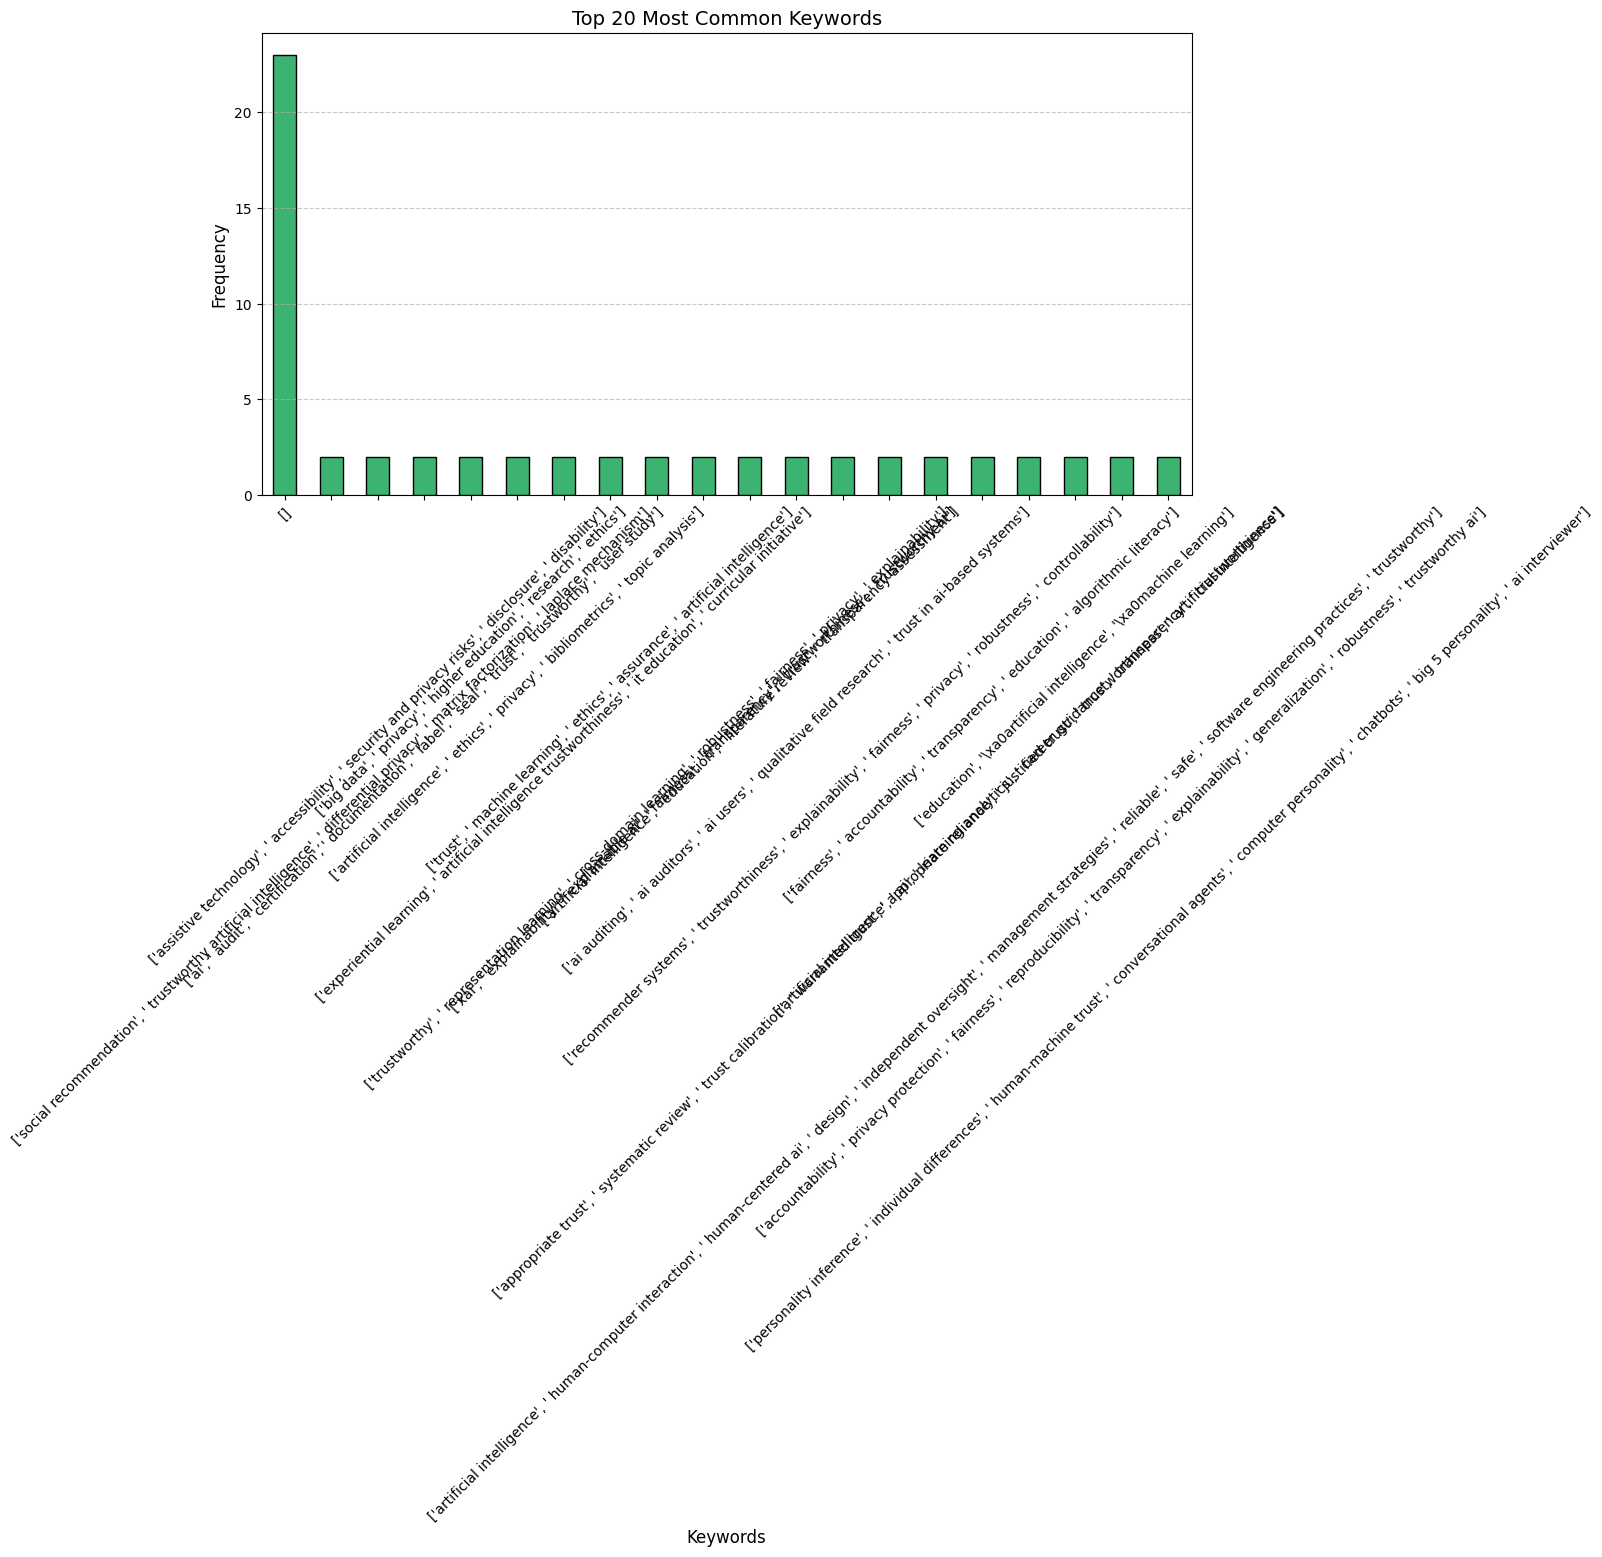

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from tkinter import Tk
from tkinter.filedialog import askopenfilename

def read_data(file_path):
    """Reads data from an Excel file."""
    try:
        data = pd.read_excel(file_path)
        return data
    except Exception as e:
        print(f"Error reading file {file_path}: {e}")
        return None

def save_figure(fig_id, folder='images', extension='png', resolution=300):
    """Saves the figure to a file."""
    if not os.path.exists(folder):
        os.makedirs(folder)
    file_path = os.path.join(folder, f"{fig_id}.{extension}")
    plt.savefig(file_path, format=extension, dpi=resolution)

def visualize_publications_by_year(articles):
    """Visualizes the number of publications per year."""
    if 'Year Published' in articles.columns:
        pub_by_year = articles.groupby('Year Published').size()
        plt.figure(figsize=(10, 6))
        pub_by_year.plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title('Number of Publications per Year', fontsize=14)
        plt.xlabel('Year', fontsize=12)
        plt.ylabel('Number of Publications', fontsize=12)
        plt.xticks(rotation=45, fontsize=10)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        save_figure("publications_per_year")
        plt.show()
    else:
        print("The 'Year Published' column is missing in the articles file.")

def visualize_authors_distribution(authors):
    """Visualizes the distribution of authors by country."""
    if 'Country' in authors.columns:
        country_counts = authors['Country'].value_counts()
        plt.figure(figsize=(12, 6))
        country_counts.plot(kind='bar', color='lightcoral', edgecolor='black')
        plt.title('Number of Authors by Country', fontsize=14)
        plt.xlabel('Country', fontsize=12)
        plt.ylabel('Number of Authors', fontsize=12)
        plt.xticks(rotation=45, fontsize=10)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        save_figure("authors_by_country")
        plt.show()
    else:
        print("The 'Country' column is missing in the authors file.")

def visualize_keywords_frequency(articles):
    """Visualizes the most common keywords in publications."""
    if 'Keywords' in articles.columns:
        keywords_series = articles['Keywords'].dropna().str.split(';').explode()
        keyword_counts = keywords_series.value_counts().head(20)
        plt.figure(figsize=(12, 6))
        keyword_counts.plot(kind='bar', color='mediumseagreen', edgecolor='black')
        plt.title('Top 20 Most Common Keywords', fontsize=14)
        plt.xlabel('Keywords', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.xticks(rotation=45, fontsize=10)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        save_figure("keywords_frequency")
        plt.show()
    else:
        print("The 'Keywords' column is missing in the articles file.")

# Prompt user to select files
Tk().withdraw()  # Hide the root Tkinter window
print("Please select the articles file.")
articles_file = askopenfilename(title="Select Articles File", filetypes=[("Excel Files", "*.xlsx")])
print("Please select the authors file.")
authors_file = askopenfilename(title="Select Authors File", filetypes=[("Excel Files", "*.xlsx")])

if articles_file and authors_file:
    articles = read_data(articles_file)
    authors = read_data(authors_file)

    if articles is not None and authors is not None:
        # Count total authors
        total_authors = authors['Author Name'].nunique()
        print(f"Total unique authors: {total_authors}")

        # Generate visualizations
        visualize_publications_by_year(articles)
        visualize_authors_distribution(authors)
        visualize_keywords_frequency(articles)
    else:
        print("Failed to read one or both files. Please check the file paths and formats.")
else:
    print("File selection was canceled.")
